In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [20,10]

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape, test.shape

((35000, 20), (15000, 19))

In [4]:
## Univariate Analysis

combined = pd.concat([train,test],ignore_index = False)

In [5]:
num = combined.select_dtypes(include=np.number)
num.head(2)

,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.3
1,0.20,1,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.4


In [6]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            50000 non-null  float64
 1   rate_code                50000 non-null  int64  
 2   store_and_fwd_flag       50000 non-null  object 
 3   payment_type             50000 non-null  int64  
 4   fare_amount              50000 non-null  float64
 5   extra                    50000 non-null  float64
 6   mta_tax                  50000 non-null  float64
 7   tip_amount               50000 non-null  float64
 8   tolls_amount             50000 non-null  float64
 9   imp_surcharge            50000 non-null  float64
 10  total_amount             50000 non-null  float64
 11  pickup_location_id       50000 non-null  int64  
 12  dropoff_location_id      50000 non-null  int64  
 13  year                     50000 non-null  int64  
 14  month                 

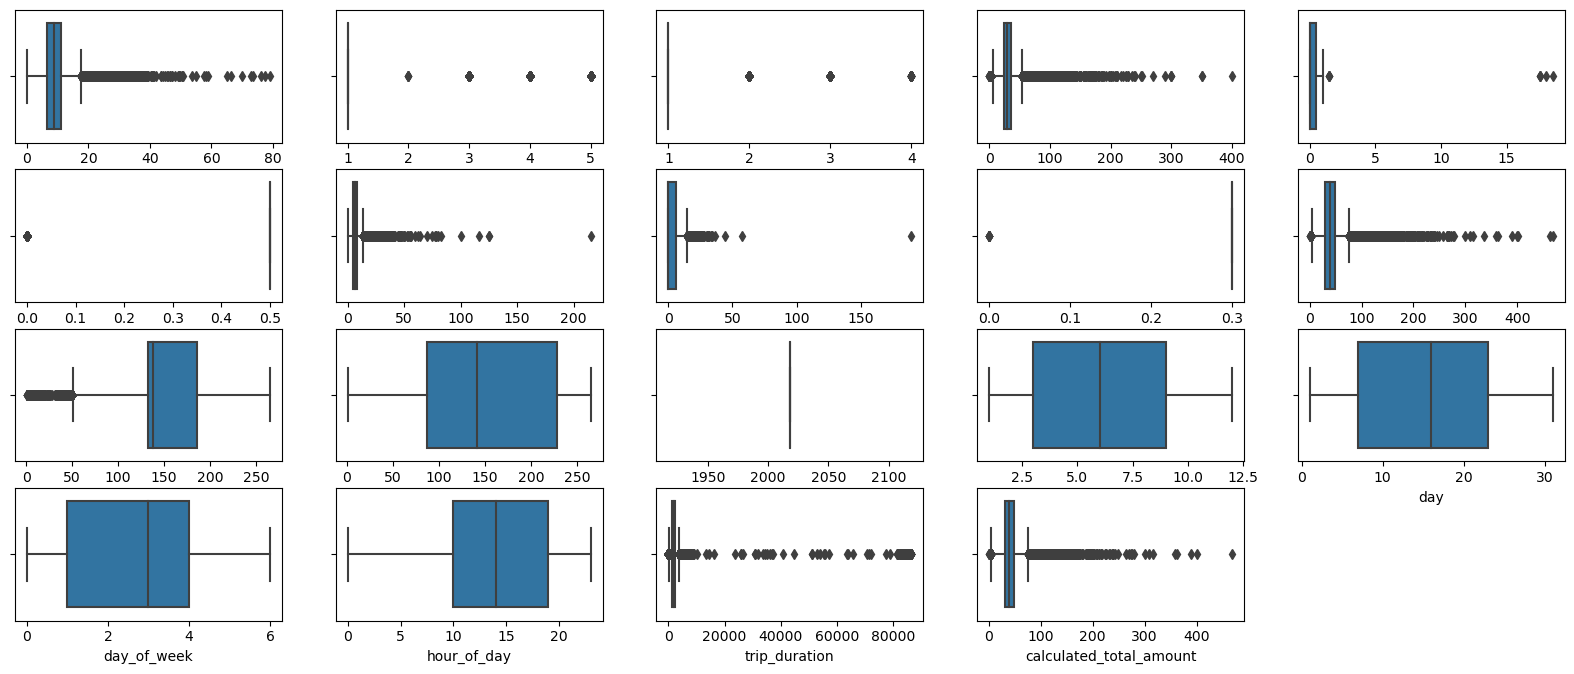

In [7]:
nrow = 5
ncol = 5
iterator = 1
for i in num.columns:
    plt.subplot(nrow,ncol,iterator)
    sns.boxplot(combined[i])
    iterator+=1
plt.show()

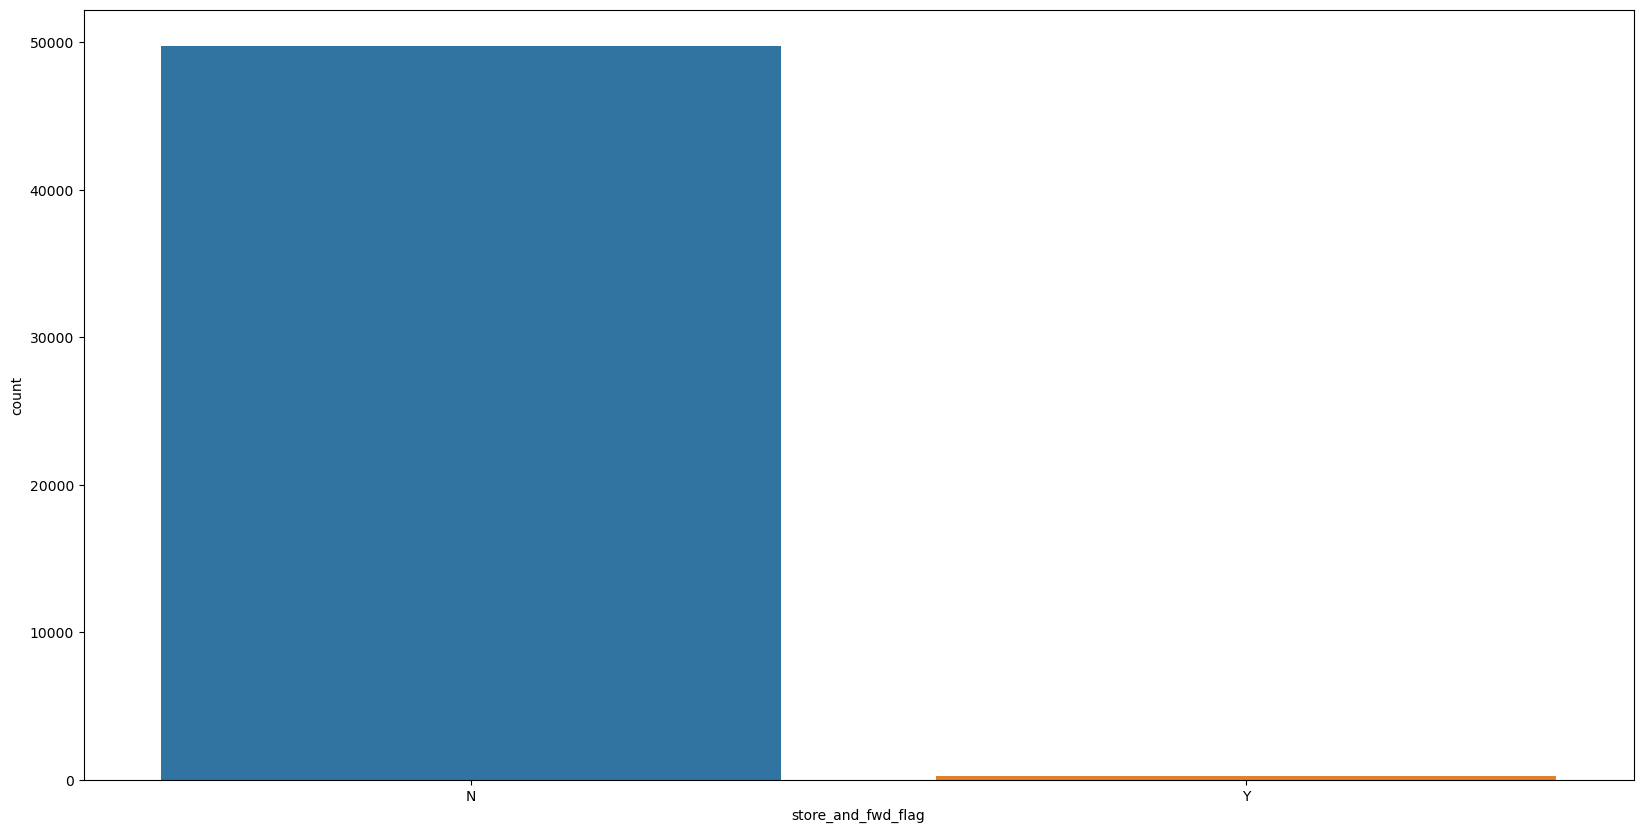

In [8]:
sns.countplot(combined['store_and_fwd_flag'])
plt.show()

In [9]:
combined['imp_surcharge'] = combined['imp_surcharge'].astype('object')
combined['mta_tax'] = combined['mta_tax'].astype('object')
combined['payment_type'] = combined['payment_type'].astype('object')
combined['rate_code'] = combined['rate_code'].astype('object')

In [10]:
cat = combined.select_dtypes(include='object')
cat.head(2)

,rate_code,store_and_fwd_flag,payment_type,mta_tax,imp_surcharge
0,1,N,1,0.5,0.3
1,1,N,1,0.5,0.3


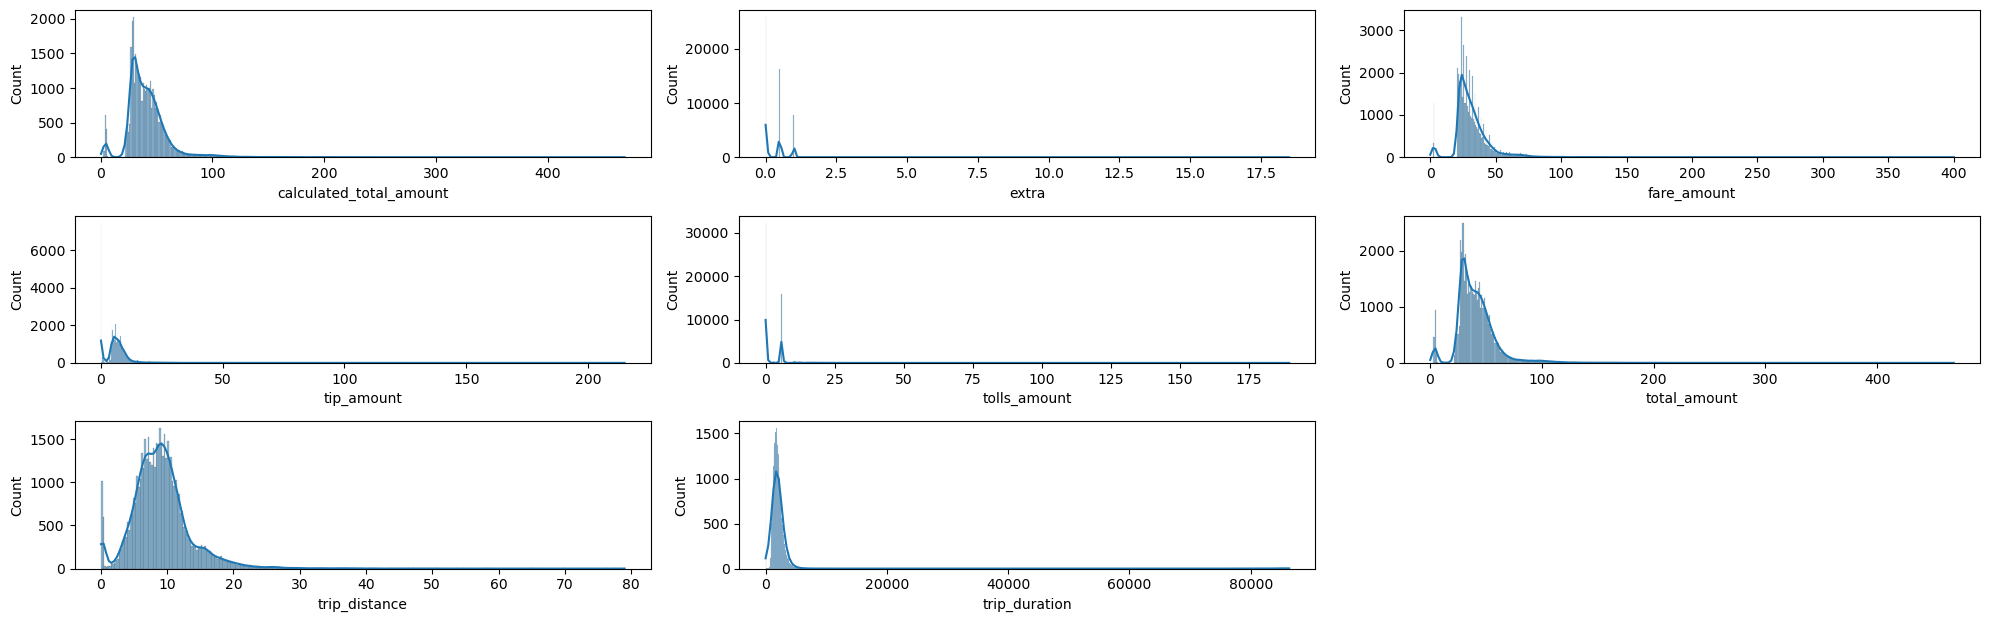

In [11]:
num_cols = ['calculated_total_amount','extra','fare_amount','tip_amount','tolls_amount','total_amount','trip_distance','trip_duration']

nrow = 5
ncol = 3
iterator = 1
for i in num_cols:
    plt.subplot(nrow,ncol,iterator)
    sns.histplot(combined[i],kde=True)
    iterator+=1
plt.tight_layout()
plt.show()

* all the numerical variables are +vely skewed

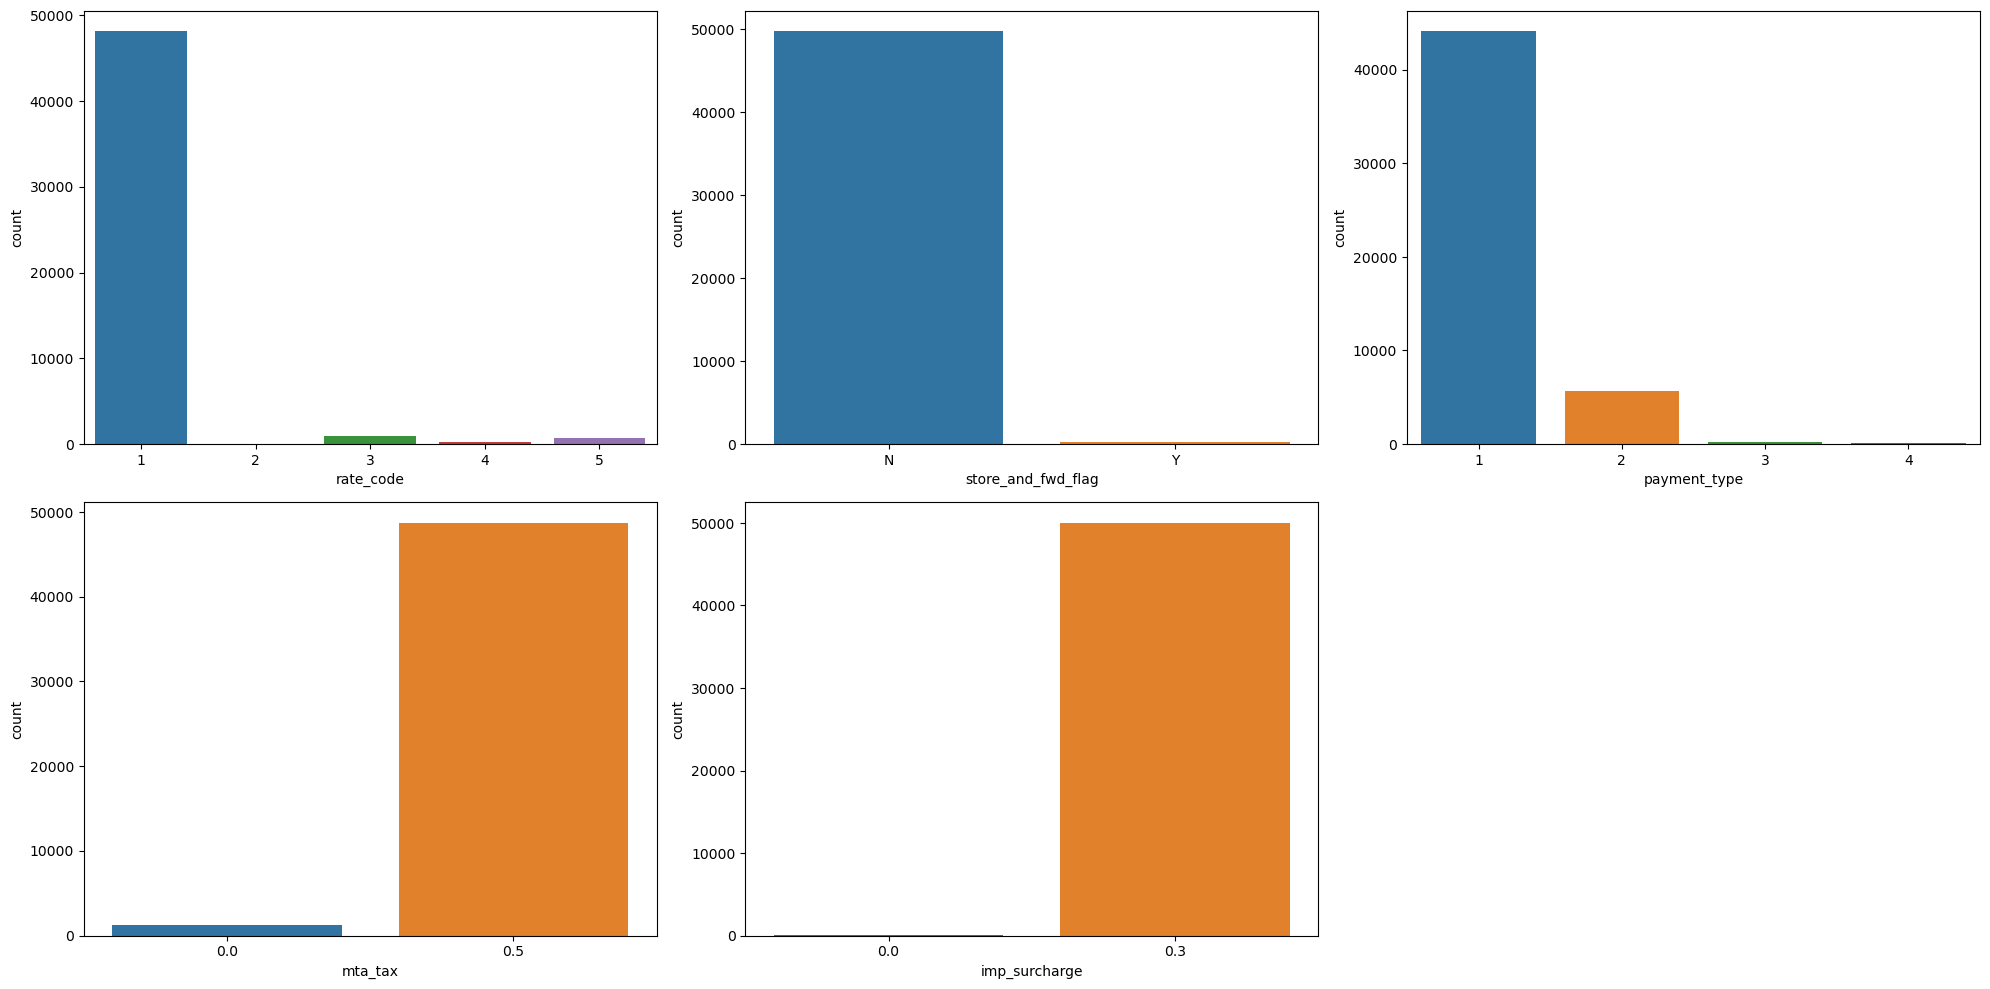

In [12]:
nrow = 2
ncol = 3
iterator = 1
for i in cat.columns:
    plt.subplot(nrow,ncol,iterator)
    sns.countplot(combined[i])
    iterator+=1
plt.tight_layout()
plt.show()

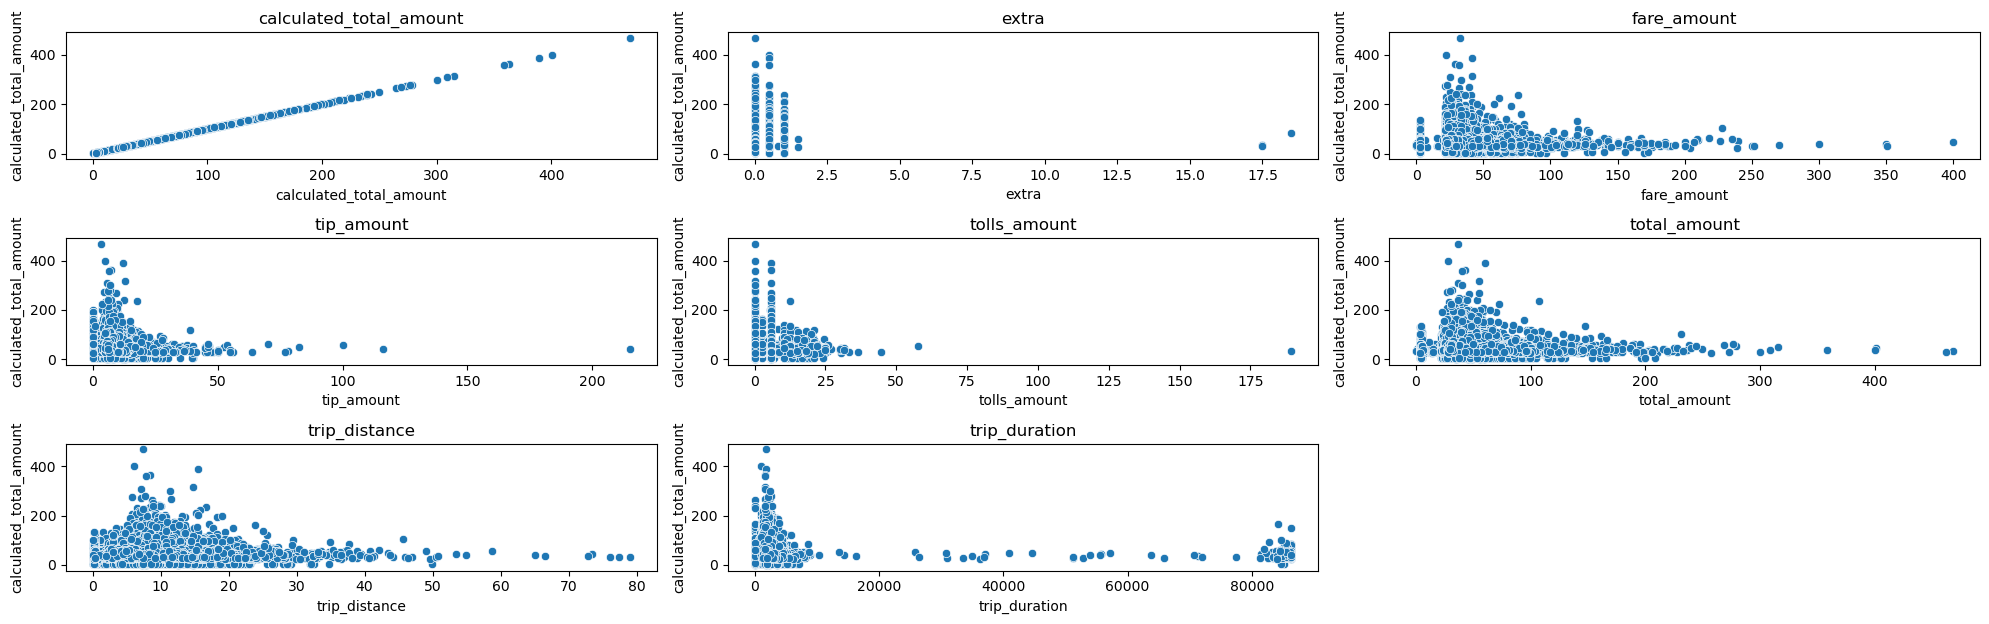

In [13]:
#Bivariate num with target

nrow = 5
ncol = 3
iterator = 1
for i in num_cols:
    plt.subplot(nrow,ncol,iterator)
    sns.scatterplot(combined[i],combined['calculated_total_amount'])
    iterator+=1
    plt.title(i)
plt.tight_layout()
plt.show()

#Bivariate Analysis - cat vs num

nrow = 5
ncol = 5
iterator = 1
for i in num_cols:
    plt.subplot(nrow,ncol,iterator)
    sns.boxplot(combined.loc[:,i],combined['calculated_total_amount'])
    iterator+=1
    plt.title(i)
plt.tight_layout()
plt.show()

In [14]:
#Missing values

combined.isnull().sum()



trip_distance                  0
rate_code                      0
store_and_fwd_flag             0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
imp_surcharge                  0
total_amount                   0
pickup_location_id             0
dropoff_location_id            0
year                           0
month                          0
day                            0
day_of_week                    0
hour_of_day                    0
trip_duration                  0
calculated_total_amount    15000
dtype: int64

<AxesSubplot:>

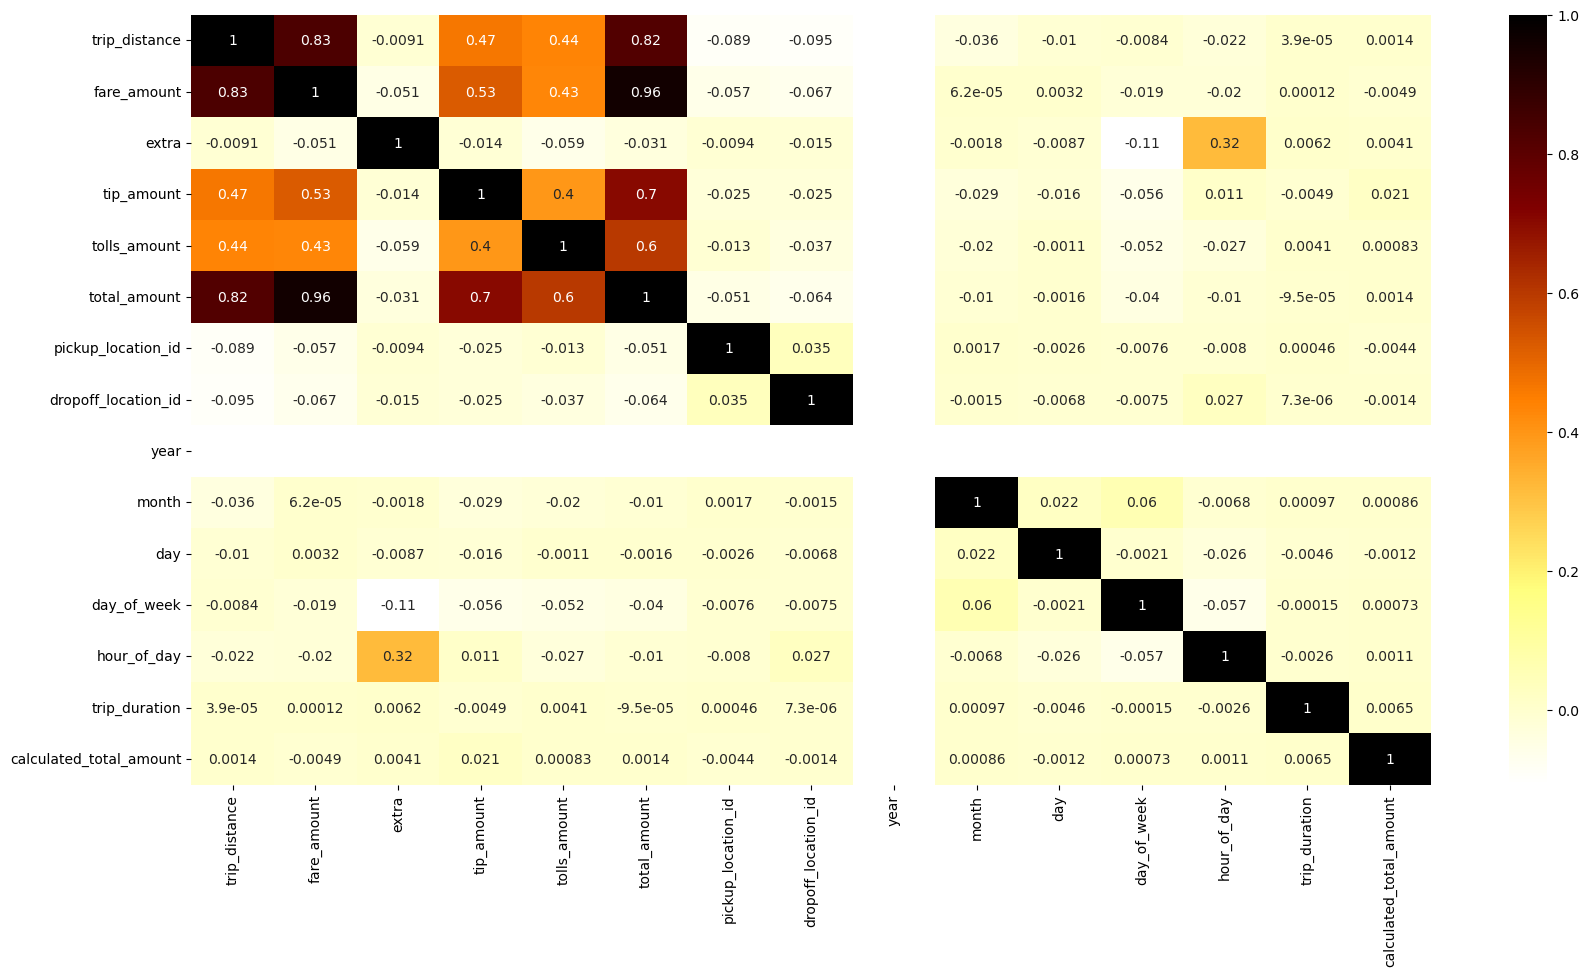

In [15]:
sns.heatmap(combined.corr(),annot=True,cmap='afmhot_r')

## Feature Engineering

In [16]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [17]:
combined.hour_of_day.describe()

count    50000.000000
mean        13.814780
std          6.222891
min          0.000000
25%         10.000000
50%         14.000000
75%         19.000000
max         23.000000
Name: hour_of_day, dtype: float64

In [18]:
combined.calculated_total_amount.describe()

count    35000.000000
mean        41.324249
std         19.167043
min          0.310000
25%         30.300000
50%         38.460000
75%         48.200000
max        468.350000
Name: calculated_total_amount, dtype: float64

ValueError: cannot reindex on an axis with duplicate labels

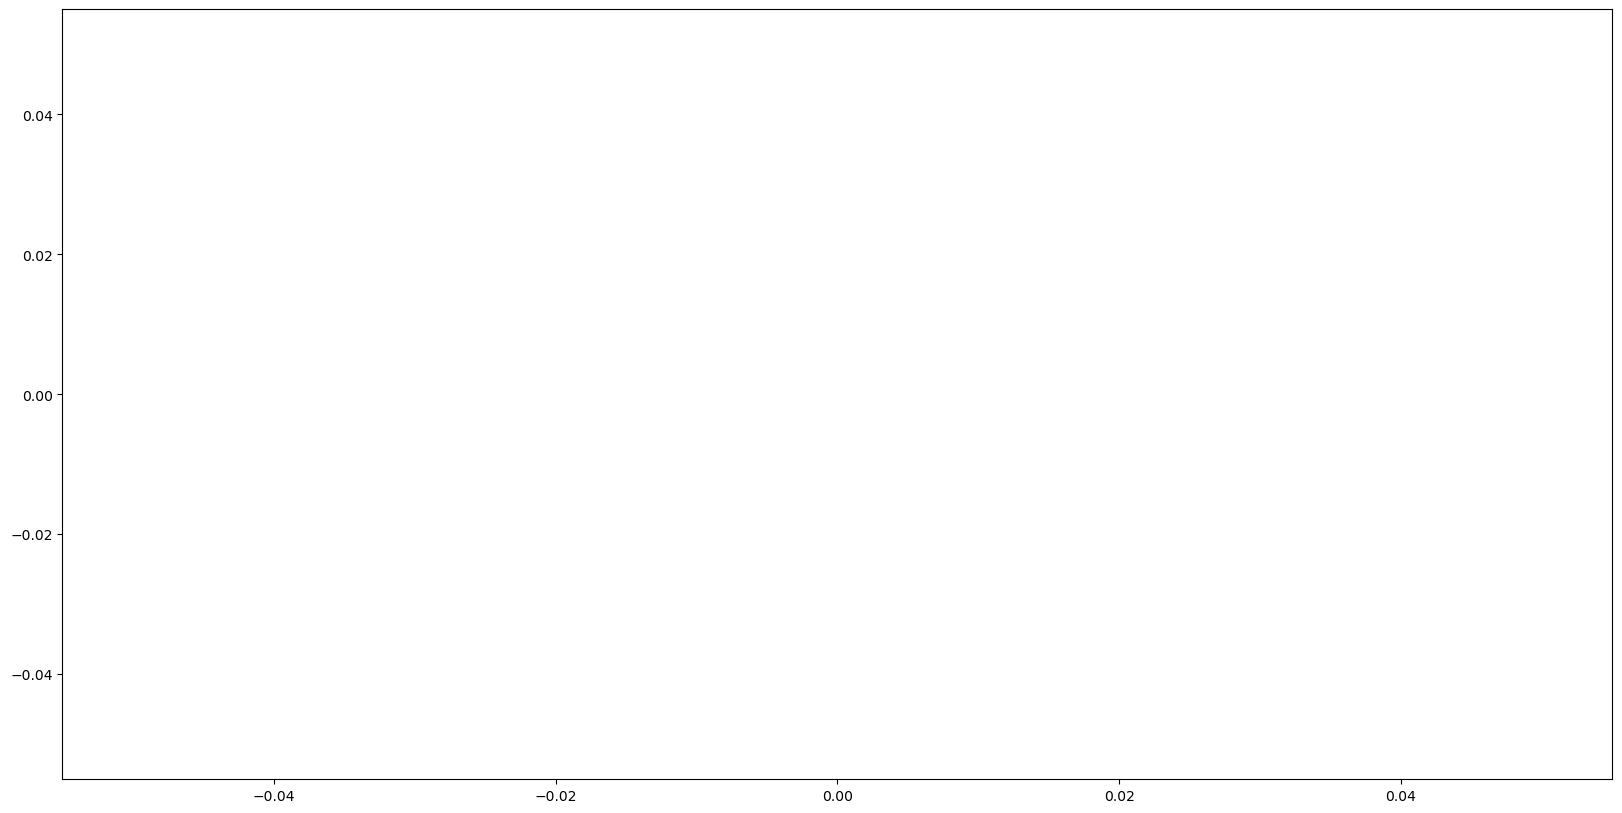

In [19]:
# sns.lineplot(x = "hour_of_day", y = "calculated_total_amount", data = combined)
# plt.show()

In [20]:
combined['calculated_total_amount'].value_counts()

27.96     442
27.36     420
29.16     384
28.56     369
29.75     328
         ... 
44.02       1
102.70      1
56.10       1
95.29       1
75.79       1
Name: calculated_total_amount, Length: 2678, dtype: int64

In [21]:
#Rush Hour

combined['rush_hour'] = combined.hour_of_day.apply(lambda x:1 if x in [6,10,15,16,17,18,19,20] else 0)

<AxesSubplot:xlabel='rush_hour', ylabel='calculated_total_amount'>

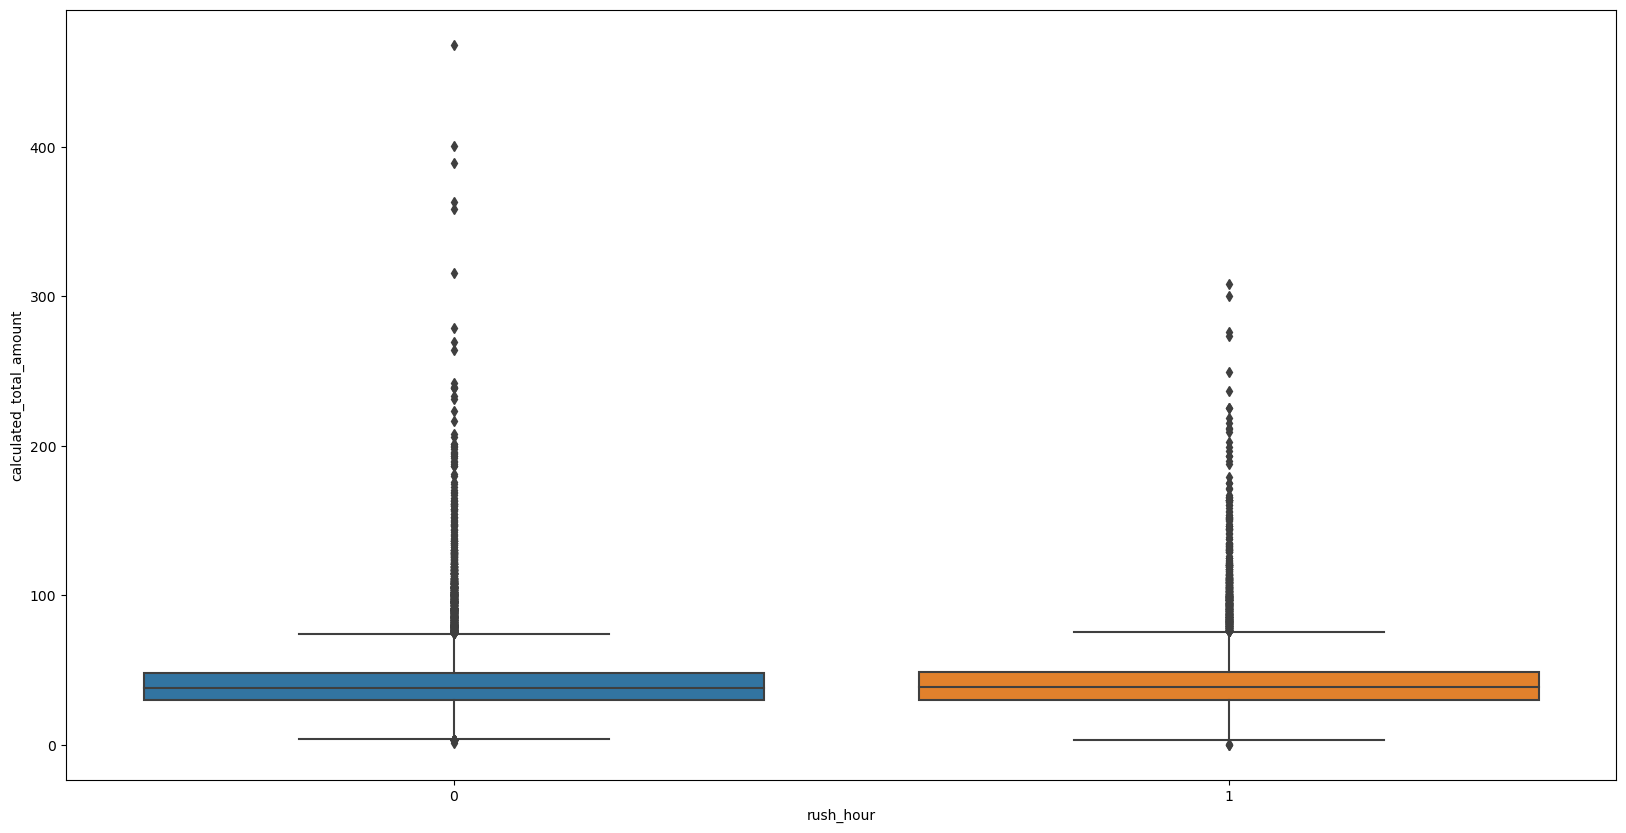

In [22]:
#Rush hour vs tgt

sns.boxplot(x='rush_hour',y='calculated_total_amount',data=combined)

<AxesSubplot:xlabel='month', ylabel='calculated_total_amount'>

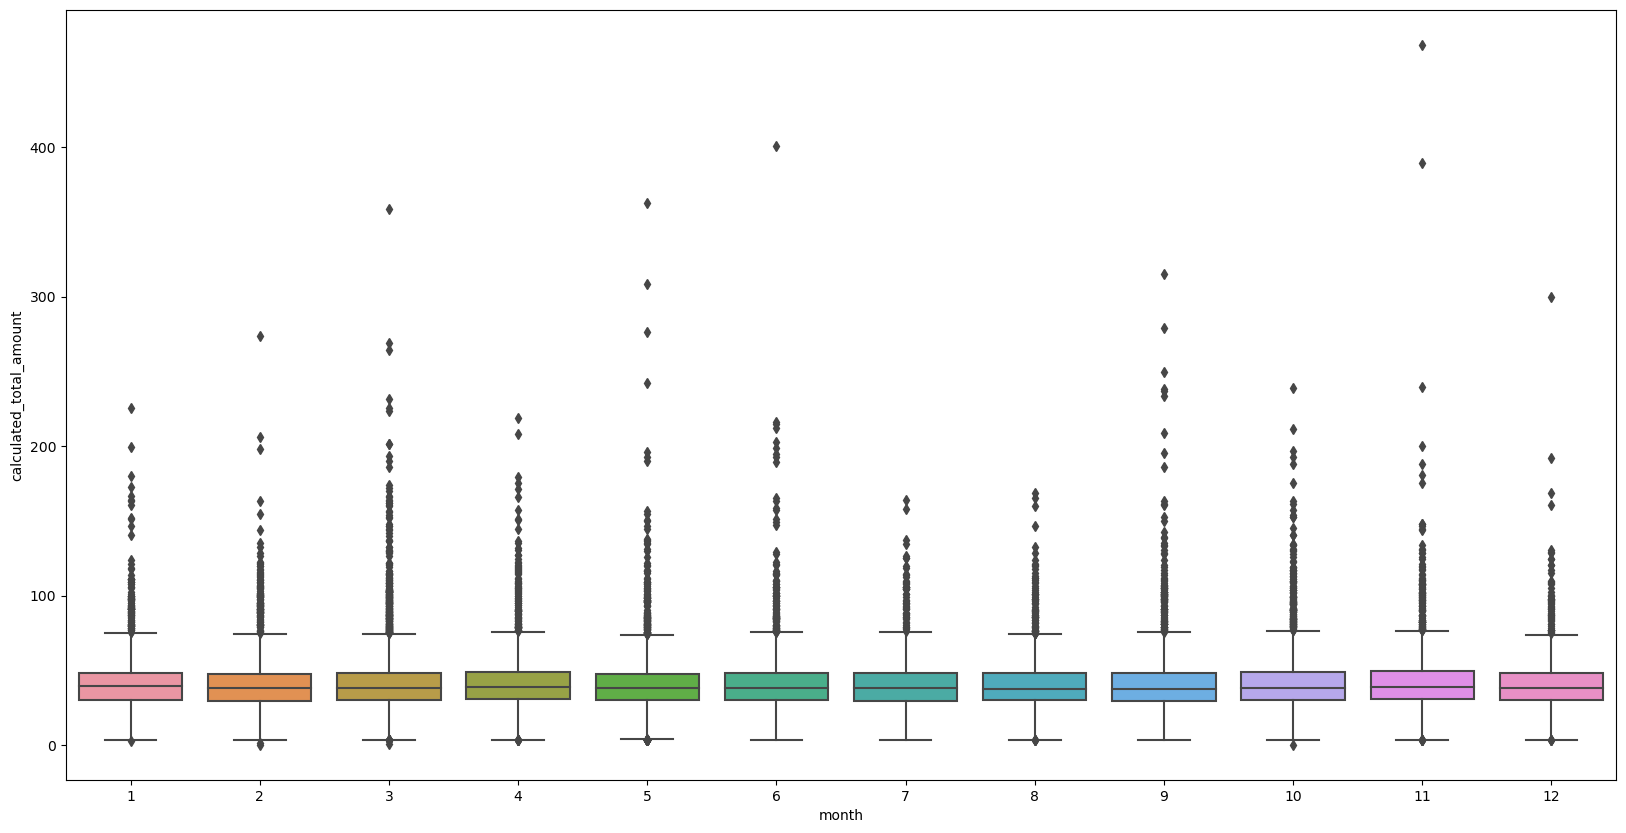

In [23]:
sns.boxplot(x='month',y='calculated_total_amount',data=combined)

## Clustering

In [30]:
# pip install yellowbrick

In [31]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans()
visualizer = KElbowVisualizer(estimator = kmeans)

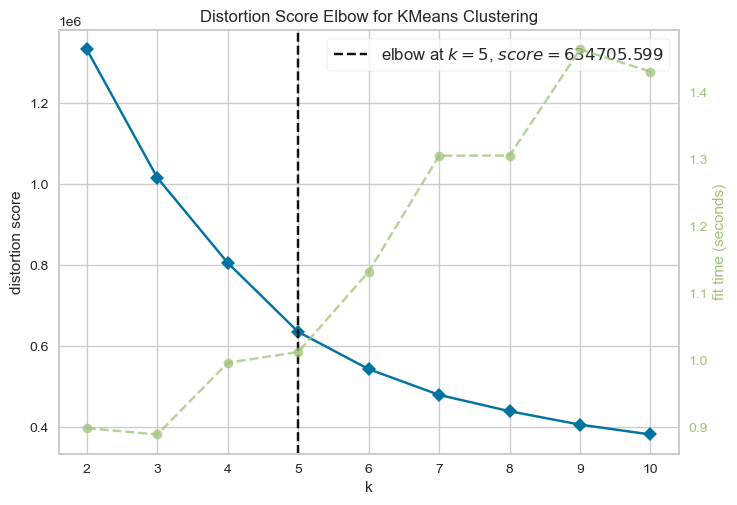

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
data = combined.loc[:,['day_of_week','hour_of_day','month']]

visualizer.fit(data)
visualizer.show()

In [33]:
#n_clusterss = 5

data = combined.loc[:,['day_of_week','hour_of_day','month']]

kmeans = KMeans(n_clusters=5,random_state=0)

k = kmeans.fit(data)

combined['clusters'] = k.labels_

In [34]:
combined.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount', 'rush_hour',
       'clusters'],
      dtype='object')

In [35]:
#Split the data in train and test

train.shape , test.shape

((35000, 20), (15000, 19))

In [36]:
newtrain = combined.iloc[0:train.shape[0],:]
newtest = combined.iloc[train.shape[0]:,:]

In [37]:
newtest.drop(columns='calculated_total_amount',axis=1,inplace=True)

In [38]:
newtrain.shape,newtest.shape

((35000, 22), (15000, 21))

## Outlier Removal

In [39]:
q1 = newtrain.quantile(0.25)
q3 = newtrain.quantile(0.75)
iqr = q3-q1

ul = q3+1.5*iqr
ll = q1-1.5*iqr

In [40]:
wt_outlier = newtrain.loc[~((newtrain<ll) |(newtrain>ul)).any(axis=1)]

In [41]:
# Drop the insignificant vars
finaltrain = wt_outlier.drop(['calculated_total_amount','year','pickup_location_id','dropoff_location_id'],axis=1)

finaltest = newtest.drop(['year','pickup_location_id','dropoff_location_id'],axis=1)

In [42]:
num_cols = ['day','day_of_week','extra','fare_amount','hour_of_day','month','tip_amount','tolls_amount','total_amount','trip_distance','trip_duration']

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(-1,1))

for i in num_cols:
    finaltrain.loc[:,i] = minmax.fit_transform(pd.DataFrame(finaltrain.loc[:,i]))
    finaltest.loc[:,i] = minmax.fit_transform(pd.DataFrame(finaltest.loc[:,i]))

In [43]:
finaltest.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,month,day,day_of_week,hour_of_day,trip_duration,rush_hour,clusters
0,-0.551266,1,N,2,-0.700057,-1.000000,0.5,-1.00000,-1.000000,0.3,-0.766004,0.636364,0.266667,0.666667,0.391304,-0.908137,1,3
1,-0.791506,1,N,1,-0.830061,-1.000000,0.5,-0.87376,-1.000000,0.3,-0.825725,-0.818182,0.533333,0.666667,0.304348,-0.965488,1,0
2,-0.575004,1,N,1,-0.730058,-0.944444,0.5,-0.86624,-1.000000,0.3,-0.743577,0.454545,-0.333333,-0.666667,0.913043,-0.967711,0,3
3,-0.917346,1,N,2,-0.853395,-1.000000,0.5,-1.00000,-1.000000,0.3,-0.884314,-0.090909,-0.600000,0.000000,-0.043478,-0.959674,0,4
4,-0.744030,1,N,1,-0.786726,-1.000000,0.5,-1.00000,-0.659172,0.3,-0.803246,-0.454545,0.266667,0.333333,-0.130435,-0.962430,1,4


In [44]:
#Dummy 
dummytrain = pd.get_dummies(finaltrain,drop_first = True)
dummytest = pd.get_dummies(finaltest,drop_first=True)

In [45]:
dummytrain.shape, dummytest.shape

((26105, 22), (15000, 23))

In [46]:
#Rate_code_2

dummytest.drop('rate_code_2',axis=1,inplace=True)
dummytest.shape

(15000, 22)

## Model Building

In [47]:
y = wt_outlier.calculated_total_amount

In [48]:
#Training and validation set to build the models

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [49]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
lr = LinearRegression()

rmse_train = []
rmse_test = []

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] #Validation Set
    ytest = y.iloc[test_index] #Validation Set
    pred_train = lr.fit(xtrain,ytrain).predict(xtrain)
    pred_test = lr.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))

print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.36551935198674
12.376492810045995


In [50]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
rmse_train = []
rmse_test = []

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] #Validation Set
    ytest = y.iloc[test_index] #Validation Set
    pred_train = dtree.fit(xtrain,ytrain).predict(xtrain)
    pred_test = dtree.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))

print(np.mean(rmse_train))
print(np.mean(rmse_test))

2.0626111976793193e-17
18.053387158581877


In [51]:
#Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
rmse_train = []
rmse_test = []

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] #Validation Set
    ytest = y.iloc[test_index] #Validation Set
    pred_train = ridge.fit(xtrain,ytrain).predict(xtrain)
    pred_test = ridge.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))

print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.365626202397603
12.375722230346426


In [52]:
#Lasso
from sklearn.linear_model import Lasso
la = Lasso(alpha=0.5)
rmse_train = []
rmse_test = []

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] #Validation Set
    ytest = y.iloc[test_index] #Validation Set
    pred_train = la.fit(xtrain,ytrain).predict(xtrain)
    pred_test = la.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))

print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.392158144315555
12.391967385912054


In [53]:
from sklearn.ensemble import AdaBoostRegressor
ad = AdaBoostRegressor()
rmse_train = []
rmse_test = []

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] #Validation Set
    ytest = y.iloc[test_index] #Validation Set
    pred_train = ad.fit(xtrain,ytrain).predict(xtrain)
    pred_test = ad.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))

print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.360235080449073
12.377728271780743


In [54]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
rmse_train = []
rmse_test = []

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] #Validation Set
    ytest = y.iloc[test_index] #Validation Set
    pred_train = gb.fit(xtrain,ytrain).predict(xtrain)
    pred_test = gb.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))

print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.200447831959028
12.384635642282245


In [55]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
rmse_train = []
rmse_test = []

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] #Validation Set
    ytest = y.iloc[test_index] #Validation Set
    pred_train = xgb.fit(xtrain,ytrain).predict(xtrain)
    pred_test = xgb.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))

print(np.mean(rmse_train))
print(np.mean(rmse_test))

10.028084396358583
12.809196716822948


In [56]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
rmse_train = []
rmse_test = []

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] #Validation Set
    ytest = y.iloc[test_index] #Validation Set
    pred_train = lgbm.fit(xtrain,ytrain).predict(xtrain)
    pred_test = lgbm.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))

print(np.mean(rmse_train))
print(np.mean(rmse_test))

11.549583122533907
12.43930930109095


In [57]:
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=2,n_estimators=49,reg_lambda=1.6)
rmse_train = []
rmse_test = []

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] #Validation Set
    ytest = y.iloc[test_index] #Validation Set
    pred_train = xgb.fit(xtrain,ytrain).predict(xtrain)
    pred_test = xgb.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))

print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.27149670428059
12.383350736436634


In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:

xgb = RandomForestRegressor(min_samples_leaf=4,n_estimators=500,random_state=0)
rmse_train = []
rmse_test = []

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] #Validation Set
    ytest = y.iloc[test_index] #Validation Set
    pred_train = xgb.fit(xtrain,ytrain).predict(xtrain)
    pred_test = xgb.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))

print(np.mean(rmse_train))
print(np.mean(rmse_test))

7.834234626133383
12.505159811250294


## Final Prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(min_samples_leaf=4,n_estimators=500,random_state=0)

pred = []
for train_index,test_index in kfold.split(dummytrain,y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(dummytest))


In [ ]:
finalpred = pd.DataFrame(pred).T.mean(axis=1)
sub = pd.DataFrame({'calculated_total_amount':finalpred })
sub.to_csv('RFmodel-para.csv',index=False)

## stacking model

In [ ]:
from sklearn.ensemble import StackingRegressor
base = [('lr',lr),('gbm',gb),('xgb',xgb),('lgbm',lgbm)]
final = RandomForestRegressor(n_estimators=500,min_samples_leaf = 4,random_state = 0)

stack = StackingRegressor(estimators=base,final_estimator=final,cv=5)

pred = stack.fit(dummytrain,y).predict(dummytest)
#finalpred = pd.DataFrame(pred).T.mean(axis=1)
sub = pd.DataFrame({'Calculated_total_amount':pred})
sub.to_csv('stackingregressor.csv',index=False)

In [ ]:
pd.DataFrame(rf.feature_importance_,
            index = dummytest.columns,
            columns = ['Feats'])
sort_values(by='Feats').plot(kind='barh')